In [129]:
from easy_trilateration.model import *  
from easy_trilateration.least_squares import easy_least_squares  
from easy_trilateration.graph import *  
import pandas as pd

FILEDATE = '2021_12_30_01_26_38'
NUM_OF_ANCHORS = 10
ROUTE_NUM = '2'

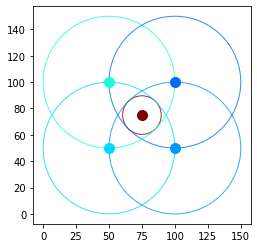

In [130]:
arr = [Circle(x=100, y=100, r=50),  
Circle(x=100, y=50, r=50),  
Circle(x=50, y=50, r=50),  
Circle(x=50, y=100, r=50)]  
result, meta = easy_least_squares(arr)  
create_circle(result, target=True)  
draw(arr)
# print(result, meta)

In [131]:
### REAL DATA
data = pd.read_csv('./uwb_data_multiple/' + FILEDATE + '.csv')
### FAKE DATA
# data = pd.read_csv('C:/Users/user/Documents/CRC2/trilateration/uwb_data_example/straight.csv')
# data = pd.read_csv('C:/Users/user/Documents/CRC2/trilateration/uwb_data_example/circle.csv')
print(data)

      year  month  day  hour  min  sec    ms    anchor    distance  \
0     2021     12   30     1   26   44  4730  ANCHOR_6         nil   
1     2021     12   30     1   26   44  6520  ANCHOR_6         nil   
2     2021     12   30     1   26   44  8520  ANCHOR_6   1.7331002   
3     2021     12   30     1   26   45   520  ANCHOR_6   1.4240142   
4     2021     12   30     1   26   45  2520  ANCHOR_6    1.564317   
...    ...    ...  ...   ...  ...  ...   ...       ...         ...   
1106  2021     12   30     1   27   21  8520  ANCHOR_7   6.6092243   
1107  2021     12   30     1   27   21  8520  ANCHOR_2         nil   
1108  2021     12   30     1   27   21  8520  ANCHOR_0     7.41027   
1109  2021     12   30     1   27   21  8520  ANCHOR_4         nil   
1110  2021     12   30     1   27   21  8520  ANCHOR_5   3.6068032   

              dirX         dirY         dirZ  
0              nil          nil          nil  
1              nil          nil          nil  
2              nil

In [132]:
def is_same_time(data1, data2):
    return data1[['hour', 'min', 'sec', 'ms']].equals(data2[['hour', 'min', 'sec', 'ms']])
    
def is_dist_valid(data):
    return data['distance'][0] != 'nil' and data['distance'][0] != ' nil'

def getAnchorNum(data):
    anchor_name = data['anchor'][0]
    anchor_num = int(anchor_name[-1])
    return anchor_num

In [133]:
# nodes: [(x1, y1), ... ]
anchors = [_ for _ in range(NUM_OF_ANCHORS)] 

def setAnchor(anchor_number, x, y):
    anchors[anchor_number] = (x, y)
    return

In [134]:
coord_x = []
coord_y = []

def getIntersectionPoint(anchor_and_dist):
    arr = []
    for (anchor, dist) in anchor_and_dist:
        x, y = anchors[anchor]
        arr.append(Circle(x, y, dist))

    result, meta = easy_least_squares(arr)  
    coord_x.append(result.center.x)
    coord_y.append(result.center.y)


In [135]:
##### REAL DATA #####
setAnchor(anchor_number=0, x=0, y=5.5)
setAnchor(anchor_number=1, x=3, y=10.15)
setAnchor(anchor_number=2, x=2.55, y=6.15)
setAnchor(anchor_number=3, x=4.2, y=6.15)
setAnchor(anchor_number=4, x=0, y=3.1)
setAnchor(anchor_number=5, x=2.55, y=3.1)
setAnchor(anchor_number=6, x=4.2, y=3.1)
setAnchor(anchor_number=7, x=0, y=0)
setAnchor(anchor_number=8, x=2.55, y=0)
setAnchor(anchor_number=9, x=4.2, y=0)

circle_data_arr = []

# for data size check
dist_not_valid = 0
valid_data = 0

for i in range(data.shape[0]):
    data0 = data[i:i+1].reset_index(drop=True) # new data line
    
    # (1) check whether the new line has same time with previous one
    #       -> if same, add to circle array
    #       -> if not, check circle array length and get position or initialize it
    # (2) check distance validity -> if not, continue
    if not is_dist_valid(data0):
        dist_not_valid += 1
        continue

    if (len(circle_data_arr)==0 or is_same_time(data0, circle_data_arr[-1])):# and is_dist_valid(data0):
        circle_data_arr.append(data0)
    
    else:
        if len(circle_data_arr) > 2:
            # print(circle_data_arr)
            valid_data += len(circle_data_arr)

            arr = []
            for tmp in circle_data_arr:
                anchor_num = getAnchorNum(tmp)
                dist = float(tmp['distance'][0])
                
                arr.append((anchor_num, dist))

            # print(arr)
            getIntersectionPoint(arr)

        circle_data_arr = [data0]
        

print('no dist, valid, total')
print(dist_not_valid, valid_data, data.shape[0])

no dist, valid, total
308 766 1111


In [138]:
route_1 = [(5.15, 4.7), (2.9, 4.7), (0.75, 4.7), (0.75, 7.1), (0.75, 8), (3, 8), (3.9, 8)]
route_2 = [(5.15, 4.7), (2.9, 4.7), (0.75, 4.7), (0.75, 2.45), (0.75, 1.55), (3, 1.55), (5.15, 1.55)]
route = {'NONE':[], 1: route_1, 2: route_2}

route_x = []
route_y = []

for x, y in route[ROUTE_NUM]: 
    route_x.append(x)
    route_y.append(y)

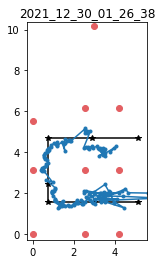

In [137]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()
plt.xlim(-0.3, 5.6)
plt.ylim(-0.3, 10.35)
plt.gca().set_aspect('equal')

# title
plt.title(FILEDATE)

# plot anchors
for x, y in anchors:
    ax.plot(x, y, color= '#e35f62', marker='o')

# plot route
ax.plot(route_x, route_y, color='black', marker='*')

# plot real data
ax.plot(coord_x, coord_y, marker='.')

plt.show()